In [5]:
import pandas as pd
import numpy as np
import dill as pickle
import seaborn as sns
import matplotlib.pyplot as plt
from pre_process.signal_process import  butter_LPF_Viz as signal_process

In [46]:
## home pc
with open(r'E:\01_Programming\Py\MasterThesis_CUDA\test_dataset\dump_file\cuda_tracking_home_experimental.pickle', 'rb') as file:
    load_tracking = pickle.load(file)

## Functions

In [51]:
def to_dataframe_OneObject(pickle_object, int_obj):
    
    ## convert OF_mag to optical flow bins
    df_opflow2 = pd.DataFrame(pickle_object[int_obj]['OF_mag'], 
                                     columns= [
                                         'bins_0', 'bins_1', 'bins_2', 'bins_3', 
                                         'bins_4', 'bins_5', 'bins_6', 'Bins_7'])
    ## create instance of Frame series 
    series_frame = pd.DataFrame(pickle_object[int_obj]['Frame'], columns= ['Frame'])
    
    ## process signal filtering 
    filtered_opflow  = signal_process(df_opflow2, cutoff=2, fs=60, order=1)
    
    ## combine bins dataframe with frame series
    filtered_opflow = pd.concat([filtered_opflow, series_frame], axis=1)
    
    return filtered_opflow

def visualize_opflow(dataframe):
    labels = ['0-45°', '315-360°', '270-315°', '225-270°',
              '180-225°', '135-180°', '90-135°', '45-90°']

    for i in range(dataframe.shape[1]):
        columns = dataframe.columns[i]
        if columns == 'Frame':
            break
        else:
            sns.lineplot(data=dataframe, x='Frame', y=dataframe[columns], label=labels[i])
    
    plt.xlabel('Frame')
    plt.ylabel('Magnitude')
    plt.title('HOOF Magnitude Over Frames')
    plt.legend(title='Angle Bins')
    plt.show()

In [47]:
filtered_opflow1 = to_dataframe_OneObject(load_tracking, 1)
filtered_opflow1

,bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6,Bins_7,Frame
0,1.434482e-03,1.790587,8.714314,699.687589,217.323855,0.056653,0.155662,0.121880,55
1,1.771438e-03,2.042725,9.275818,697.086071,194.366557,0.083593,0.199648,0.126650,56
2,2.187544e-03,2.345922,10.174701,695.738355,172.833094,0.112035,0.246970,0.132610,57
3,2.701392e-03,2.728245,11.502510,691.846642,152.702982,0.142131,0.298625,0.140028,58
4,3.335941e-03,3.214598,13.300701,679.577056,132.914815,0.174110,0.359154,0.150352,59
...,...,...,...,...,...,...,...,...,...
227,2.480842e-20,0.379932,6.058788,17979.648251,37.125922,0.019585,0.035661,2.656524,301
228,2.024227e-20,0.349711,7.211746,16720.288063,45.055692,0.015440,0.026398,1.919766,302
229,1.658057e-20,0.335117,8.686933,15292.456916,54.997487,0.011985,0.018314,1.268785,303
230,1.365971e-20,0.276293,10.367070,13887.645827,67.303922,0.009066,0.011049,0.674495,304


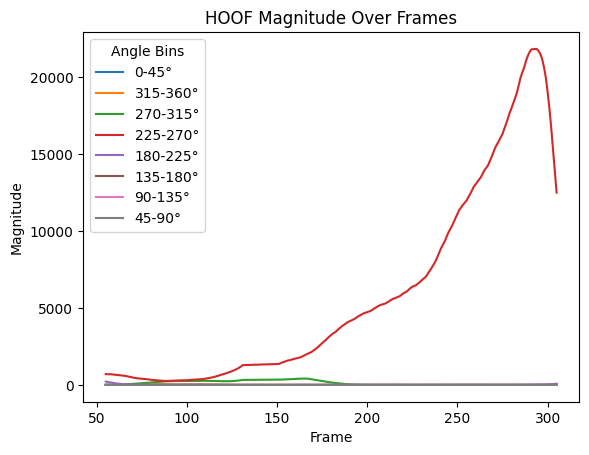

In [52]:
visualize_opflow(filtered_opflow1)

In [49]:
filtered_opflow2 = to_dataframe_OneObject(load_tracking, 2)
filtered_opflow2

,bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6,Bins_7,Frame
0,-0.012260,6.612590,6.308129,11.240339,2.002147,0.171248,0.321227,4.064287,90
1,-0.008442,5.626328,5.342838,9.601746,1.984381,0.512277,0.738048,6.768209,91
2,-0.005002,4.805446,4.521325,8.213446,1.975970,0.787949,1.045983,8.407298,92
3,-0.001784,4.169117,3.858265,7.094951,1.953081,0.933508,1.244270,9.474794,93
4,0.001353,3.692260,3.344139,6.228679,1.930330,0.961042,1.366343,10.175896,94
...,...,...,...,...,...,...,...,...,...
291,13.334789,1191.802528,27.314503,3.446574,2.433208,30.559932,5.902474,149.437550,383
292,10.880435,1366.205922,32.969481,3.775868,2.154966,37.393922,6.997478,182.732599,384
293,8.912233,1507.191402,40.033904,4.166638,1.573114,45.898716,8.404021,224.192358,389
294,7.342240,1475.983011,44.649079,3.460111,0.969954,56.454321,10.183831,274.896314,390


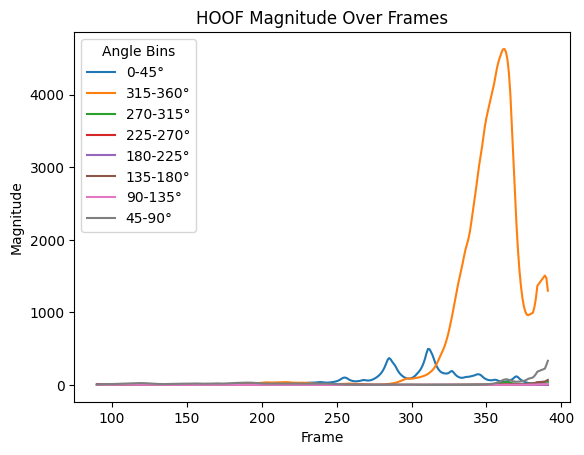

In [53]:
visualize_opflow(filtered_opflow2)